# Importing Libraries

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

In [23]:
file_path = 'IRIS.csv'  
df = pd.read_csv(file_path)

In [24]:
df.shape

(150, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### There are no Null values, hence good to proceed

In [27]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Visualization

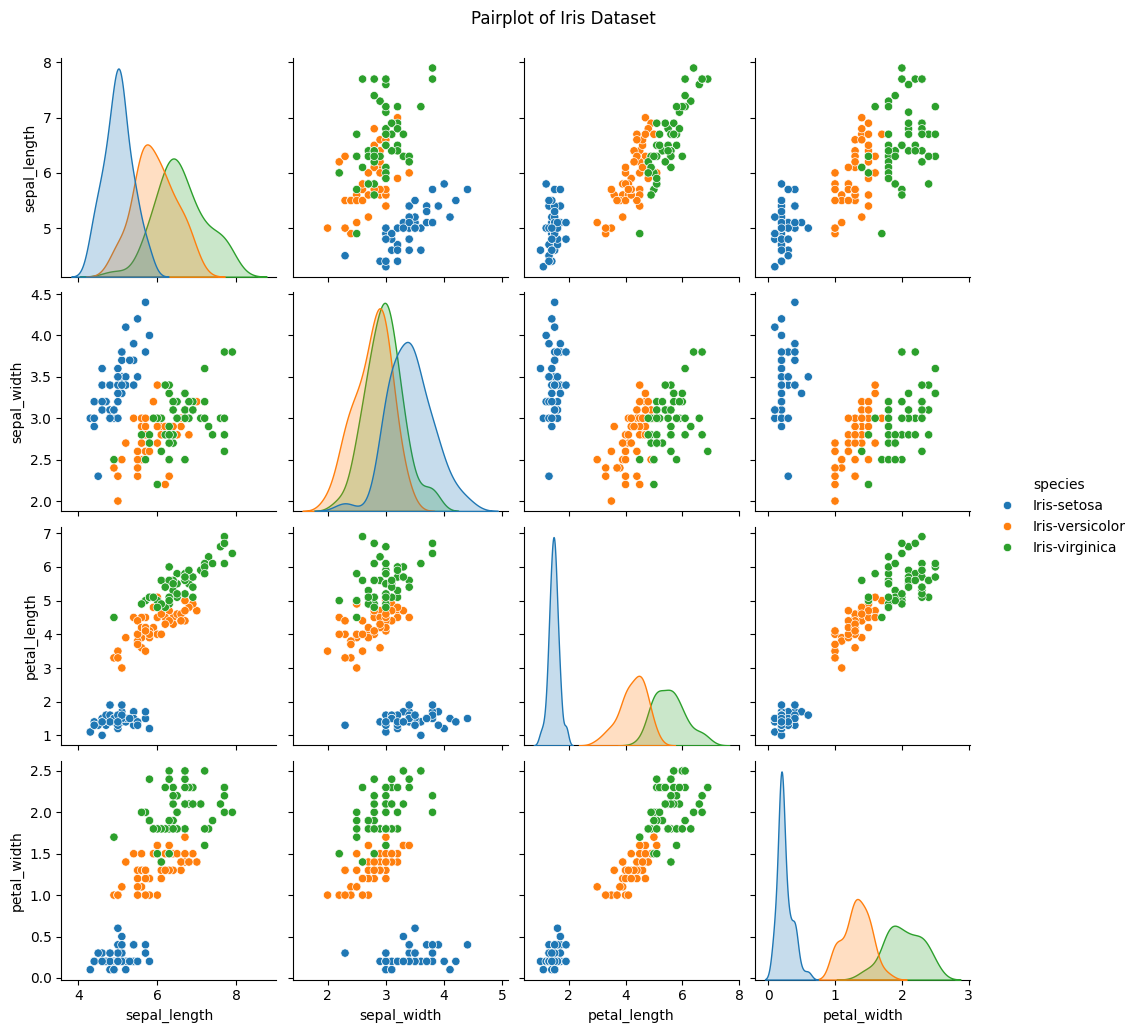

In [29]:
pair = sns.pairplot(df, hue='species')
pair.fig.suptitle("Pairplot of Iris Dataset", y=1.03)
plt.show()

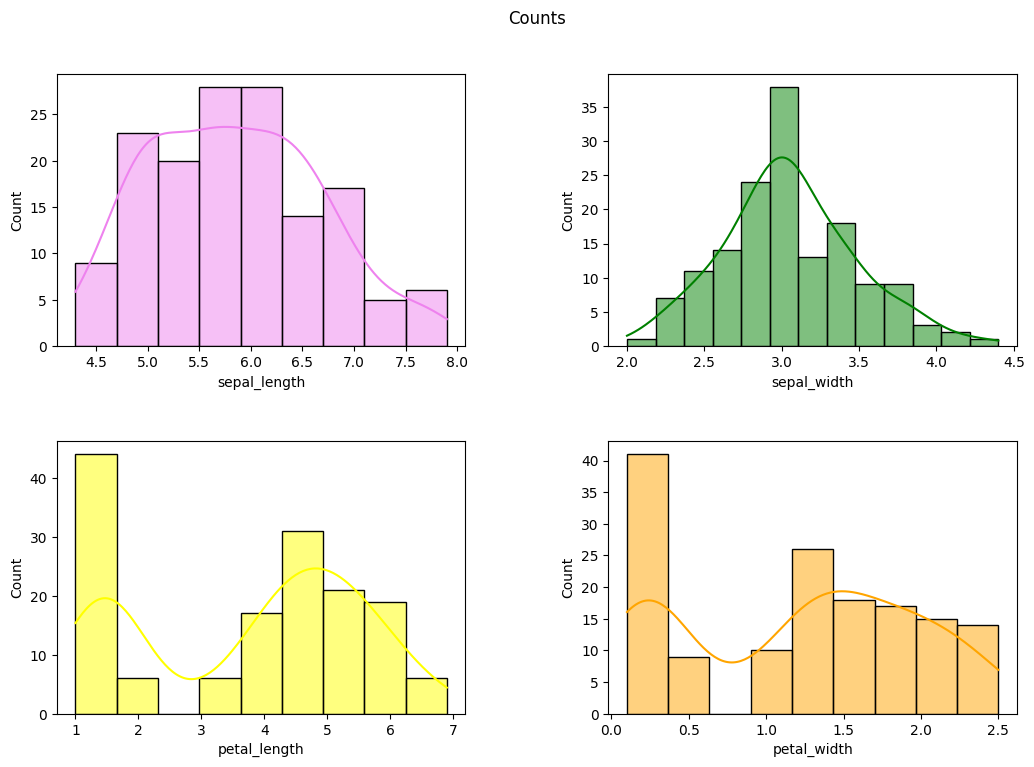

In [30]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Counts")
fig.add_subplot(221)
sns.histplot(df['sepal_length'], kde=True, color = "violet")
fig.add_subplot(222)
sns.histplot(df['sepal_width'], kde=True, color = "green")
fig.add_subplot(223)
sns.histplot(df['petal_length'], kde=True, color = "yellow")
fig.add_subplot(224)
sns.histplot(df['petal_width'], kde=True, color = "orange")
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.35, hspace=0.35)
plt.show()

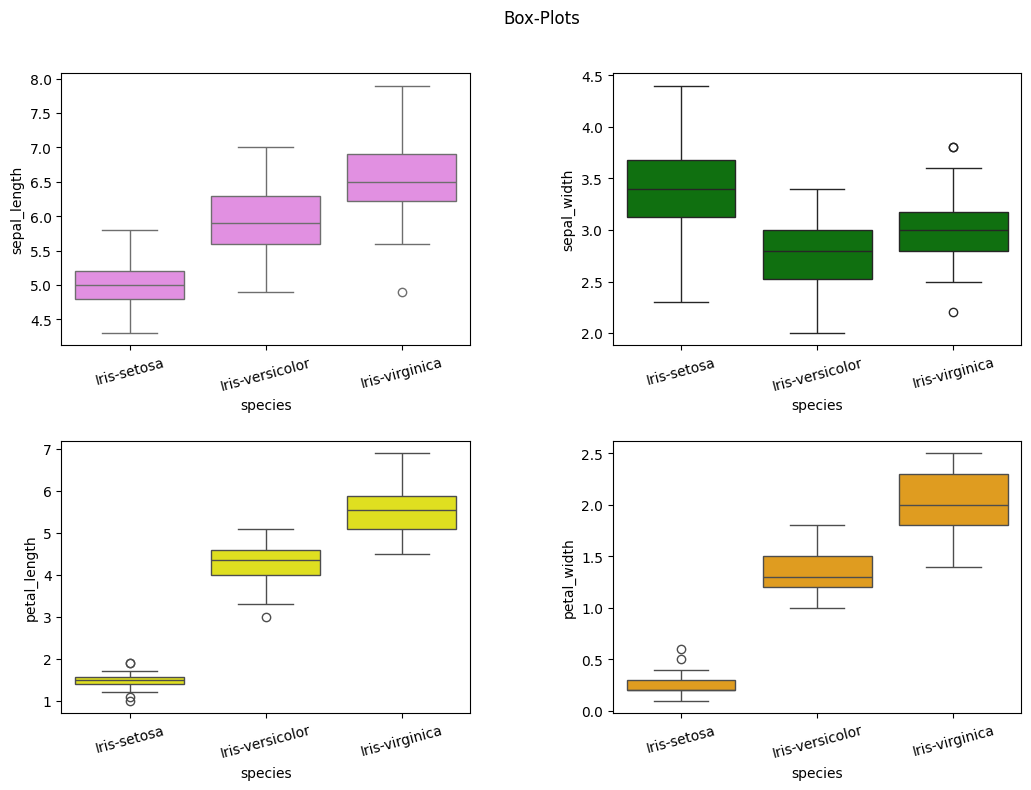

In [31]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Box-Plots")
fig.add_subplot(221)
sns.boxplot(data=df, x='species', y='sepal_length', color = "Violet")
plt.xticks(rotation=15) 
fig.add_subplot(222)
sns.boxplot(data=df, x='species', y='sepal_width', color = "green")
plt.xticks(rotation=15)
fig.add_subplot(223)
sns.boxplot(data=df, x='species', y='petal_length', color = "yellow")
plt.xticks(rotation=15)
fig.add_subplot(224)
sns.boxplot(data=df, x='species', y='petal_width', color = "orange")
plt.xticks(rotation=15)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.35, hspace=0.35)
plt.show()



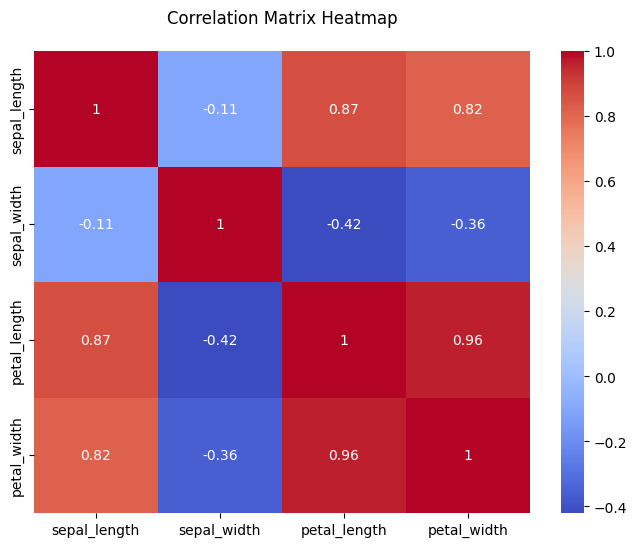

In [32]:
numeric_iris = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_iris.corr()

# Plot the heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap', pad = 20)
plt.show()

# Separating Features and Target

In [33]:
X = df.drop('species', axis=1)
y = df['species']

# Model - Support Vector Machine

In [34]:
svm = SVC()

# Hyperparameter Tuning and Finding Best Train and Test split

In [35]:
# Define grid of parameters to search (C: regularization parameter, gamma: kernel coefficient)
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly']}

# Use GridSearchCV for parameter tuning and split ratio using cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform nested cross-validation to determine best split ratio (test_size)
best_test_size = None
best_score = 0.0

for test_size in [0.1, 0.2, 0.3, 0.4]:  # Test different split ratios
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Perform GridSearchCV on training data
    grid_search.fit(X_train, y_train)

    # Print best parameters found by GridSearchCV
    print("Best Parameters:", grid_search.best_params_)
    
    # Get best model and its score
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_test_size = test_size

# Print best test_size found
print()
print("Best Test Size:", best_test_size)

# Split data with best test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test_size, random_state=42)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

Best Test Size: 0.1


# Model Training and Accuracies

In [36]:
# Train SVM classifier with best parameters found
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Make predictions on training set
y_train_pred = best_svm.predict(X_train)

# Calculate accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print()
print("Training Accuracy:", train_accuracy * 100)

# Make predictions on test set
y_test_pred = best_svm.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print()
print("Test Accuracy:", test_accuracy * 100)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print()
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Training Accuracy: 98.51851851851852

Test Accuracy: 100.0

Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Confusion Matrix : Predicted vs True

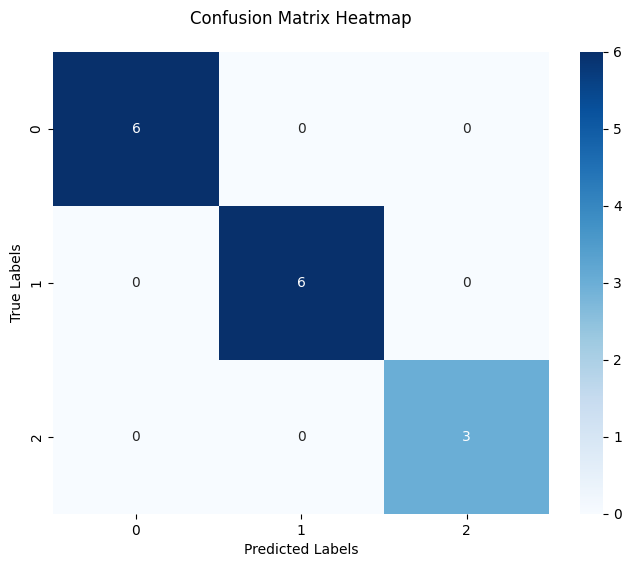

In [37]:
cm = confusion_matrix(y_test, y_test_pred)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap',pad = 20)
plt.show()

# User Input Prediction

In [38]:
# Function to predict the species based on user input
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    # Create a DataFrame with the input data and feature names
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], 
                              columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    prediction = best_svm.predict(input_data)
    return prediction[0]

# Get user input for prediction
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Predict the species based on user input
predicted_species = predict_species(sepal_length, sepal_width, petal_length, petal_width)
print()
print("Predicted Species:", predicted_species)


Enter sepal length:  6.7
Enter sepal width:  3.3
Enter petal length:  5.7
Enter petal width:  2.1



Predicted Species: Iris-virginica
